### Facial expression Embeddings

The project is inspired from **A Compact Embedding for Facial Expression Similarity** paper by Raviteja Vemulapalli and Aseem Agarwala.

[Paper Link](https://arxiv.org/pdf/1811.11283)

The idea behind the project is we need to make a model which understands human expressions not by just categorical features like happy, anger etc as human expressions are far to complex and are continous they are not discrete, hence we need to map facial expressions in continous fashion for which we use compact embedding space that mimics human visual preference.

In the paper the an image is mapped to 16d embeddings as accuracy increaes upto 16 and decreases after that, we will also use 16d embeddings same as research paper.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# !unzip "/content/drive/MyDrive/data images/FEC_dataset.zip" -d "/content/drive/MyDrive/data images"

### About Dataset
[Dataset link](https://research.google/tools/datasets/google-facial-expression/)

*   The Dataset contains a csv file which has above 400k rows.
*   Each row in csv has three links which is download link of the three images(triplets) and also coordinates of bounding box of faces for all three images.
*   Each row also contains 6 annotations by different person which tells us which images' expressions are similar, for example if annotaion is 2 it says 1, 3 are more similar.
*   Each row has also a column **triplet type** which can belong to one of the three categories named **ONE_CLASS_TRIPLET** (where all three image have same expressions for example all three are happy), **TWO_CLASS_TRIPLET** (Where two images share same expressions), **THREE_ClASS_TRIPLET** (all images have different expressions).

### Preprocessing Done
*  As each triplet has 6 annotations we take **mode **of that as our annotation column and delete all rest other.
*  As each row contains links of image, we downloaded images into our disk following a name scheme such that we can access it easily.
*  The Name scheme was **triplet i image j** where i ranges from 0 to length of dataset and j ranges from 1, 2, 3.


As Dataset was very large we decided to train our model on 13k triplets.




In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/data images/FEC_dataset/faceexp-comparison-data-train-public.csv', error_bad_lines=False, header=None)
df_cleaned = pd.read_csv('/content/drive/MyDrive/data images/FEC_dataset/faceexp-comparison-data-train-public_cleaned.csv', error_bad_lines=False, nrows=13000)

In [ ]:
# cleaned dataframe with columns name changed

df_cleaned.head()

,Unnamed: 0,link1,x11,x21,y11,y21,link2,x12,x22,y12,y22,link3,x13,x23,y13,y23,triplet type,annotator1_id,annotation1,annotator2_id,annotation2,annotator3_id,annotation3,annotator4_id,annotation4,annotator5_id,annotation5,annotator6_id,annotation6
0,0,http://farm5.staticflickr.com/4108/5185055338_...,0.142578,0.266602,0.065421,0.297508,http://farm3.staticflickr.com/2127/5765052001_...,0.439490,0.596178,0.289062,0.427734,http://farm4.staticflickr.com/3747/8914150145_...,0.345703,0.453125,0.075110,0.262150,ONE_CLASS_TRIPLET,269701,2,291701,2,321402,2,321501,2,321902,3,322102,2
1,1,http://farm5.staticflickr.com/4108/5185055338_...,0.142578,0.266602,0.065421,0.297508,http://farm4.staticflickr.com/3543/3387356856_...,0.335938,0.441406,0.130307,0.311859,http://farm4.staticflickr.com/3674/9280612097_...,0.359307,0.562771,0.514648,0.673828,TWO_CLASS_TRIPLET,291701,3,321402,2,321601,3,4295017797,2,4295017896,2,48316,2
2,2,http://farm5.staticflickr.com/4108/5185055338_...,0.142578,0.266602,0.065421,0.297508,http://farm4.staticflickr.com/3858/14540292875...,0.206442,0.524158,0.078125,0.325195,http://farm5.staticflickr.com/4116/4747184973_...,0.387695,0.547852,0.184694,0.380612,ONE_CLASS_TRIPLET,300901,2,321902,2,322102,1,4295017797,1,4295017896,1,48316,2
3,3,http://farm5.staticflickr.com/4108/5185055338_...,0.718750,0.826172,0.194704,0.394081,http://farm4.staticflickr.com/3875/14501588548...,0.318665,0.488619,0.162109,0.290039,http://farm1.staticflickr.com/89/241047479_eb0...,0.290000,0.430000,0.197333,0.413333,TWO_CLASS_TRIPLET,321402,3,321501,3,321601,3,321902,3,322102,3,48316,2
4,4,http://farm5.staticflickr.com/4108/5185055338_...,0.718750,0.826172,0.194704,0.394081,http://farm6.staticflickr.com/5143/5693754914_...,0.244141,0.380859,0.175000,0.413235,http://farm4.staticflickr.com/3666/12590745114...,0.250000,0.371094,0.242291,0.453745,ONE_CLASS_TRIPLET,269701,3,321501,2,321601,3,321902,2,322102,2,41207,2


In [ ]:
# header = ['index',
#           'link1',
#  'x11',
#  'x21',
#  'y11',
#  'y21',
#  'link2',
#  'x12',
#  'x22',
#  'y12',
#  'y22',
#  'link3',
#  'x13',
#  'x23',
#  'y13',
#  'y23',
#  'triplet type',
#  'annotator1_id',
#  'annotation1',
#  'annotator2_id',
#  'annotation2',
#  'annotator3_id',
#  'annotation3',
#  'annotator4_id',
#  'annotation4',
#  'annotator5_id',
#  'annotation5',
#  'annotator6_id',
#  'annotation6',
#  ]

In [ ]:
# #df.columns = header
# df_cleaned.columns = header

In [ ]:
## Importing Necessary Modules
## Code to download the images and save with the nomenclature stated above

import requests # to get image from the web
import shutil # to save it locally
import os

d = 0

for i in range(len(df)):
  flag = False
  for j in range(1, 4):
    if flag == True:
      continue
    
    image_url = df.iloc[i]['link'+str(j)]
    filename = '/content/drive/MyDrive/face images/'+'triplet'+str(d)+' img'+str(j)+'.jpg'
    # Open the url image, set stream to True, this will return the stream content.
    r = requests.get(image_url, stream = True)

  
    # Check if the image was retrieved successfully
    if r.status_code == 200:
        # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
        r.raw.decode_content = True
    
        # Open a local file with wb ( write binary ) permission.
        with open(filename,'wb') as f:
            shutil.copyfileobj(r.raw, f)
        
        print('Image sucessfully Downloaded: ',filename)

    else:
        flag = True
        for k in range(1, j):
          filename = '/content/drive/MyDrive/face images/'+'triplet'+str(d)+' img'+str(k)+'.jpg'
          os.remove(filename)
          print('Image Deleted', d, k)
          
        
  
  if flag == True:
    
    df_cleaned = df_cleaned.drop(d)
    df_cleaned = df_cleaned.reset_index(drop=True)
    d = d-1
    

  d += 1


Streaming output truncated to the last 5000 lines.
Image sucessfully Downloaded:  /content/drive/MyDrive/face images/triplet10768 img1.jpg
Image sucessfully Downloaded:  /content/drive/MyDrive/face images/triplet10768 img2.jpg
Image sucessfully Downloaded:  /content/drive/MyDrive/face images/triplet10768 img3.jpg
Image sucessfully Downloaded:  /content/drive/MyDrive/face images/triplet10769 img1.jpg
Image sucessfully Downloaded:  /content/drive/MyDrive/face images/triplet10769 img2.jpg
Image sucessfully Downloaded:  /content/drive/MyDrive/face images/triplet10769 img3.jpg
Image sucessfully Downloaded:  /content/drive/MyDrive/face images/triplet10770 img1.jpg
Image Deleted 10770 1
Image sucessfully Downloaded:  /content/drive/MyDrive/face images/triplet10770 img1.jpg
Image sucessfully Downloaded:  /content/drive/MyDrive/face images/triplet10770 img2.jpg
Image sucessfully Downloaded:  /content/drive/MyDrive/face images/triplet10770 img3.jpg
Image sucessfully Downloaded:  /content/drive/M

KeyboardInterrupt: ignored

In [ ]:
## export the cleaned df
df_cleaned.to_csv('/content/drive/MyDrive/data images/FEC_dataset/faceexp-comparison-data-train-public_cleaned.csv')

In [ ]:
len(df_cleaned)

13000

In [ ]:
# ## visulaizing the triplets
# for i in range(40):
#   print()
#   print()
#   try :
#     for j in range(1, 4):
#       img = cv2.imread('/content/drive/MyDrive/face images/'+'triplet' + str(i) + ' img' + str(j)+ '.jpg')
#       x1 = df_cleaned.iloc[i]['x1'+str(j)]
#       x2 = df_cleaned.iloc[i]['x2'+str(j)] ## coordinates for face crop from image
#       y1 = df_cleaned.iloc[i]['y1'+str(j)]
#       y2 = df_cleaned.iloc[i]['y2'+str(j)]
#       height, width,channels = img.shape
#       crop = img[int(height*y1): int(height*y2), int(width*x1) : int(width*x2)]
#       crop = cv2.resize(crop, (299, 299))
#       plt.figure()
#       plt.imshow(crop)
#   except:
#     continue

###Data Loading and preprocessing

*  As we are interested in expressions of the image we need to crop face from every images.

* As we have an annotation column which tells us which image is dissimilar lets load our image in a fashion such that first two images are similar and third is dissimilar image, this will ensure that we only need to make one triplet loss or our triplet loss is independent of annotation.

*  We also resize the image to (299, 299, 3) as expected by InceptionV3 model which we will use for transfer learning.






In [ ]:
# function to load the dataset
# it return an numpy array of shape (m, 3, 299, 299, 3) 

def get_triplet(start, end):
  X = []
  for  i in range(start, end):
    print(i, end=' ')
     # this function will be used to iterate over triplets
    df_cleaned_i = df_cleaned.iloc[i]
    triplet = []
    for j in range(1, 4): # iterating over a triplet
      img = cv2.imread('/content/drive/MyDrive/face images/'+'triplet' + str(i) + ' img' + str(j)+ '.jpg') # reading the image
      x1 = df_cleaned_i['x1'+str(j)]
      x2 = df_cleaned_i['x2'+str(j)] ## coordinates for face crop from image
      y1 = df_cleaned_i['y1'+str(j)]
      y2 = df_cleaned_i['y2'+str(j)]

      height, width,channels = img.shape

      crop = img[int(height*y1): int(height*y2), int(width*x1) : int(width*x2)]
      crop = cv2.resize(crop, (299, 299))
      triplet.append(crop)
  
    annot = []
    for k in range(1, 7):
      annot.append(df_cleaned_i['annotation'+str(k)])

    dissimilar_img_index = int(np.median(annot))-1 # finding dissimalr image in a triplet

    #aligning the triplet in such a way that similar images occurs first then dissimilar this will help us after in triplet loss function

    triplet[2], triplet[dissimilar_img_index] = triplet[dissimilar_img_index], triplet[2] #swapping with last image

    X.append(triplet)

  return np.array(X)

In [ ]:
#X_val = get_triplet(12001, 12200)

In [ ]:
np.shape(X_train)

(1000, 3, 299, 299, 3)

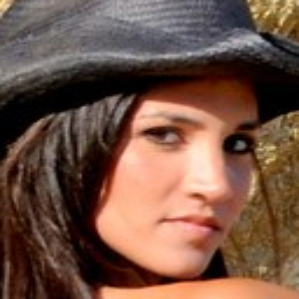

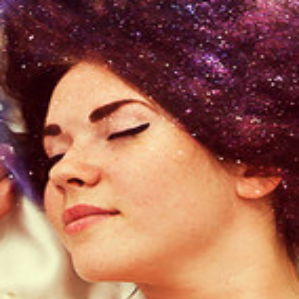

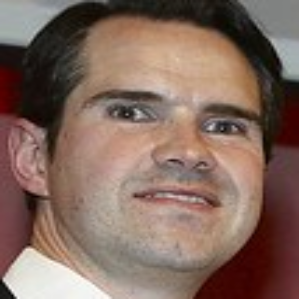

In [ ]:
for i in range(3):
  cv2_imshow(X_train[1, i]) # 2nd triplet

In [ ]:
X_temp = X_train.reshape((90, 299, 299,3))

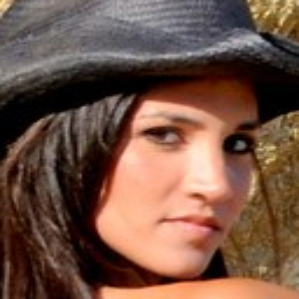

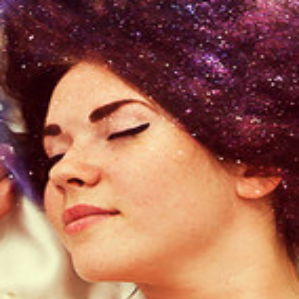

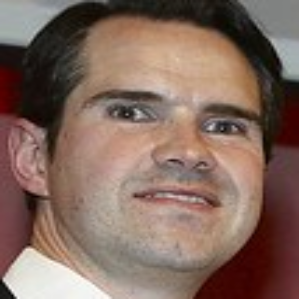

In [ ]:
for i in range(3, 6): #0, 1, 2 first triplet similarly 3, 4, 5 forms second triplet
  cv2_imshow(X_temp[i])

In [ ]:
def show_triplet(triplet):
  for image in triplet:
   cv2_imshow(image)

Notice first two images have more similar expressions than the third one this will help us to generalize triplet loss function

### Models building

Original Architecture from paper:
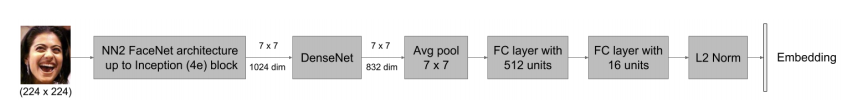

Our model is divided into two parts:
*   Pretrained **InceptionV3 upto mixed8 (concatanate)** layer.
*   Custom CNN which takes input from the Inception model and output a 16 dimensional vector.
*   In research paper **DenseNet** is used instead of our custom CNN and also old Inception is used upto **4e block**, we used newer Inception because it is available in **keras.applications** module.



In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
inception = InceptionV3()

In [ ]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
# layer_inputs = inception.input
# layer_outputs = [layer.output for layer in inception.layers]
# inception_features = tf.keras.models.Model(layer_inputs, layer_outputs)

In [ ]:
# extracting required part of InceptionV3 model

model1 = tf.keras.models.Model(inception.input, inception.layers[248].output)


In [ ]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, MaxPool2D, Input, AveragePooling2D, LayerNormalization, Concatenate

In [ ]:
def model2():
  inputs = Input((8, 8, 1280))
  x = Conv2D(1280, (3, 3), padding = 'same', activation='relu')(inputs)
  x = Dropout(0.5)(x)
          #x = Conv2D(1280, (2, 2), padding = 'same', activation='relu')(x)
          #x = Dropout(0.25)(x)
  x = BatchNormalization()(x)
  x = Conv2D(1280, (3, 3), padding = 'same', activation='relu')(inputs)
  x = Dropout(0.5)(x)
        #x = Conv2D(1024, (2, 2), padding = 'same', activation='relu')(x)
          #x = Dropout(0.25)(x)
  x = BatchNormalization()(x)
  x = Conv2D(1280, (3, 3), padding = 'same', activation='relu')(inputs)
  x = Dropout(0.5)(x)
        # x = Conv2D(1280, (2, 2), padding = 'same', activation='relu')(x)
          # x = Dropout(0.25)(x)
  x = BatchNormalization()(x)
  
  x = AveragePooling2D((8, 8))(x)
  x  =  Flatten()(x)
  x = Dropout(0.4)(x)
  x =   Dense(512, activation='relu')(x)
  x  = Dropout(0.25)(x)
  x =    Dense(16)(x)
  outputs = LayerNormalization()(x)
  model = Model(inputs, outputs)

  return model

In [ ]:
model2 = model2()

In [ ]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8, 8, 1280)]      0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 8, 8, 1280)        14746880  
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 1280)        0         
_________________________________________________________________
batch_normalization_96 (Batc (None, 8, 8, 1280)        5120      
_________________________________________________________________
average_pooling2d_9 (Average (None, 1, 1, 1280)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0   

In [ ]:
model1.trainable = False # freezing pretrained inceptionV3 weights

In [ ]:
model = Sequential([model1, model2])

In [ ]:
model.summary() #input 299*299*3

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 8, 8, 1280)        10674848  
_________________________________________________________________
model_1 (Functional)         (None, 16)                15416112  
Total params: 26,090,960
Trainable params: 15,413,552
Non-trainable params: 10,677,408
_________________________________________________________________


In [ ]:
type(X_temp)

numpy.ndarray

In [ ]:
np.shape(triplet1)

(3, 299, 299, 3)

In [ ]:
print(model(X_temp[:3])) #output of first triplet
print(model(X_temp[3:6])) #output of second triplet

tf.Tensor(
[[ 1.06625    -1.4452156   2.2320175  -0.30970433  0.6182633   0.15216608
  -0.7528598   0.33549884  0.8106192  -0.06015831  1.2637563  -0.22443527
  -1.516999   -0.53123844 -0.38382757 -1.2541326 ]
 [ 1.0051776  -1.4203954   2.3057036  -0.30520123  0.5636513   0.25980923
  -0.7959228   0.4809396   0.60518837 -0.0729543   1.3677195  -0.33211866
  -1.4191024  -0.8478288  -0.34033138 -1.054334  ]
 [ 1.0480193  -1.4461368   2.2481203  -0.31441757  0.5262759   0.19907477
  -0.8493612   0.5059476   0.5906958  -0.11068753  1.2761157  -0.05280727
  -1.4706764  -0.6964112  -0.14965567 -1.3040959 ]], shape=(3, 16), dtype=float32)
tf.Tensor(
[[ 1.06625    -1.4452156   2.2320175  -0.30970433  0.6182633   0.15216608
  -0.7528598   0.33549884  0.8106192  -0.06015831  1.2637563  -0.22443527
  -1.516999   -0.53123844 -0.38382757 -1.2541326 ]
 [ 0.9100274  -1.6619534   2.1166825   0.06412803  0.54130435  0.19436012
  -0.6946519   0.5479858   0.64816576  0.151184    1.2770271  -0.1950815
  -

### Loss Function used

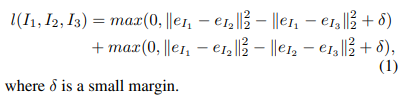

In our case I1 and I2 are similar image and I3 is the disimilar image, our goal is to learn a similarity function that output similar embeddings for similar images and also diffrence (norm) between two disimilar embdeddings should be as large as possible, the margin of difference is controlled by hyperparameter delta.

We have used delta equal to 0.2

In [ ]:
# Custom loss function

def triplet_loss(y_true, y_pred):
  img1 = y_pred[:, :16]
  img2 = y_pred[:, 16:32]
  img3 = y_pred[:, 32:48]
  temp1 = tf.square(img1-img2)-tf.square(img1-img3) + 0.2
  temp2 = tf.square(img1-img2)-tf.square(img2-img3) + 0.2

  loss = tf.reduce_sum(tf.maximum(tf.constant(0.), temp1) + tf.maximum(tf.constant(0.), temp2))

  return loss

In [ ]:
# Siamese network

def training_model():
  img1 = Input((299, 299, 3))
  img2 = Input((299, 299, 3))
  img3 = Input((299, 299, 3))

  img1_emb = model(img1)
  img2_emb = model(img2)
  img3_emb = model(img3)

  outputs = Concatenate(axis = -1)([img1_emb, img2_emb, img3_emb])
  
  model_train = Model(inputs = [img1, img2, img3], outputs = outputs)

  return model_train

In [ ]:
model = load_model('/content/drive/MyDrive/facenet model/model1.h5')

In [ ]:
model_train = training_model()

In [ ]:
model_train.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 16)           26090960    input_1[0][0]                    
                                                                 input_2[0][0]                

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr = 5e-3)

In [ ]:
model_train.compile(optimizer=optimizer, loss = triplet_loss)

In [ ]:
np.shape((X_val))

(199, 3, 299, 299, 3)

In [ ]:
#X_train = np.zeros((1000, 3, 299, 299, 3))

In [ ]:
y_train = np.zeros((250, 48))
#y_val = np.zeros((199, 48))

In [ ]:
import time

In [ ]:
##training loop
j = 0
for i in range(0, 12000, 250): # to cover all triplets
  start_time = time.time()
  X_train = get_triplet(i, i+250)
  model_train.fit([X_train[:, 0],X_train[:, 1],X_train[:, 2]] ,y_train, epochs = 1)
  end_time = time.time()
  print(end_time-start_time, ' secs')

  if i > 12000:
    i = 0
    j += 1
  
  if j == 400:
    break

8/8 [==============================] - 48s 870ms/step - loss: 206.9960
194.04058861732483  secs
8/8 [==============================] - 3s 344ms/step - loss: 201.9987
321.3268973827362  secs
8/8 [==============================] - 3s 358ms/step - loss: 201.2653
303.30875873565674  secs
8/8 [==============================] - 3s 383ms/step - loss: 199.9645
307.533105134964  secs
8/8 [==============================] - 3s 377ms/step - loss: 201.1173
302.0358350276947  secs
8/8 [==============================] - 3s 378ms/step - loss: 201.9477
293.49542260169983  secs
8/8 [==============================] - 3s 379ms/step - loss: 197.1582
308.05454182624817  secs
8/8 [==============================] - 3s 382ms/step - loss: 190.9767
285.51895928382874  secs
8/8 [==============================] - 3s 383ms/step - loss: 199.2294
293.99082684516907  secs
8/8 [==============================] - 3s 383ms/step - loss: 204.0121
318.6043028831482  secs
8/8 [==============================] - 3s 383ms/step -

In [ ]:
model.save('/content/drive/MyDrive/facenet model/model1.h5')

This model can be used for various tasks we used it to create a fun game named **MEMEPSOTER** in which given a meme image a user had to mimic the expression of the meme and based on how close the expression was, our model predicts a score between 0 to 1, this game had various levels of increasing difficulties.

## Inference Time
At inference time we just store the 16d embeddings of the memes, and ask user for the image and then we pass that image to our model to generate embeddings and then we just do apply cosine similarity between them, this bounds the score between -1 to 1 which we further scale to 0 to 1.

## Peprocesing required during Inference


*   Our first task is to crop face from the user image.
*   To crop face we use OpenCv's Cascade Classifier which given an image output the coordinates of bounding box.
*   After we knew bounding box cooradinates we just cropped that specific region of the image.
*   If by mistake model output various bounding boxes we take box with max widht + height.
*   After cropping we need to resize the image to (299, 299, 3) shape which ou model expects.




In [ ]:
import cv2
import numpy as np
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle

# function to get face image from img_path

def preprocess_image_face(image_path):
  # load the photograph
  pixels = imread(image_path)
  # load the pre-trained model
  classifier = CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
  # perform face detection
  bboxes = classifier.detectMultiScale(pixels)
  # print bounding box for each detected face
  for box in bboxes:
	  # extract
	  x, y, width, height = box
	  x2, y2 = x + width, y + height
	  # draw a rectangle over the pixels
	  #rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
  # show the image
  #cv2_imshow(pixels)

  def get_crop_of_face(bboxes, pixels):

    list_width_height = list(np.sum(bboxes[:, -2:], axis = -1))
    index_max_width_height = list_width_height.index(max(list_width_height))

    x, y, w, h = bboxes[index_max_width_height]
    x2, y2 = x + w, y + h
    height, width, _ = pixels.shape
    cropped_img = pixels[(y-int(0.1*height)):(y2+int(0.1*height)), (x-int(0.01*width)):(x2+int(0.01*width))]
    

    cropped_img = cv2.resize(cropped_img, (299, 299))
    cv2_imshow(cropped_img)
    x = cropped_img.astype(np.float32).reshape(-1, 3, 299, 299)
    #x = np.expand_dims(cropped_img, axis=0)
    #x = preprocess_input(x)
  
    return x

  return get_crop_of_face(bboxes, pixels)

In [ ]:
def cosine_sim(x1, x2):
  norm1 = (np.linalg.norm(x1))
  norm2 = (np.linalg.norm(x2))
  return np.dot(x1, x2.T)/(norm1*norm2)

### Improvements


*   We need to train our model for the full size dataset, by which our model will generate more accurate embeddings.
*   As during inference we took image from webcam which outputs poor quality images which donot match the distribution of training data, so we need to train our model with images having some transformations so that training and testing distribution matches.



### [Youtube Link for demonstration of project](https://www.youtube.com/watch?v=QIhjqoKItoI)